<a href="https://colab.research.google.com/github/rfb0408/python_data_analyst_study/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_4%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#파이썬으로 웹데이터 크롤링하기

## 1. 로또 번호 크롤링하기

Daum에서 '로또' 검색


컴퓨터한테 로또 1회를 검색하게해서 정보를 가져오게 하고...


컴퓨터한테 로또 2회를 검색하게해서 정보를 가져오게 하고...


컴퓨터한테 로또 3회를 검색하게해서 정보를 가져오게 하고...

가져온 정보들을 분석해보자!!

고찰

- Python으로 html을 다루는 기능이 필요하겠네
- 페이지 요청
- 시간 라이브러리(천천히) -> 너무 빠르게 싹 긁어가면 의심받음
- Random -> 정확한 패턴으로 긁어가면 의심받음
- Pandas 를 사용해서 자료를 분석하자


In [ ]:
from bs4 import BeautifulSoup # Python으로 Html을 다루는 라이브러리
import requests # 페이지를 요청하는 기능
import time
import random
import pandas as pd # 데이터 분석 도구 (행과 열을 구성하는 데이터 프레임)

# 200번대: 정상, 400번대: 존재하지 않는 페이지, 500번대: 제한
url = requests.get("https://search.daum.net/search?w=tot&DA=UME&t__nil_searchbox=suggest&sug=&sugo=16&sq=fhEH&o=3&q=%EB%A1%9C%EB%98%90") # 로또 검색 페이지
url.status_code

200

In [ ]:
url

<Response [200]>

In [ ]:
url.text # 가져온 정보를 보기 위해서 text 사용

In [ ]:
html = BeautifulSoup(url.text) # url.text를 python으로 다룰 수 있는 html로 만들어줌
html

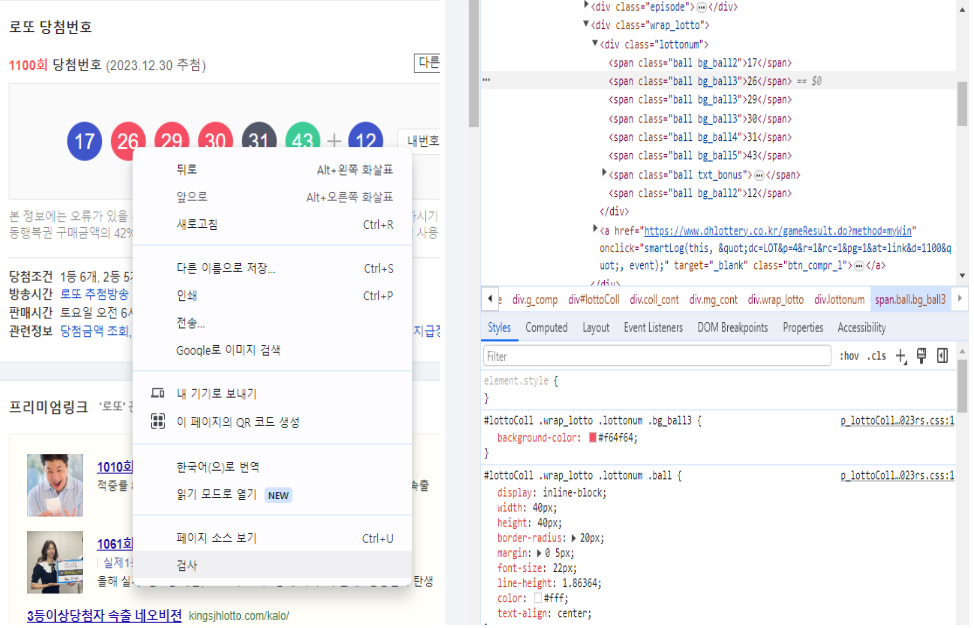

In [9]:
html = BeautifulSoup(url.text) # url.text를 python으로 다룰 수 있는 html로 만들어줌
current = int(html.find("span",class_="f_red").text[:-1])
current

1100

In [11]:
html = BeautifulSoup(url.text)
balls = int(html.find("span",class_="ball bg_ball2").text)
balls

17

In [14]:
number = html.find("div",class_="lottonum").find_all("span")
number

[<span class="ball bg_ball2">17</span>,
 <span class="ball bg_ball3">26</span>,
 <span class="ball bg_ball3">29</span>,
 <span class="ball bg_ball3">30</span>,
 <span class="ball bg_ball4">31</span>,
 <span class="ball bg_ball5">43</span>,
 <span class="ball txt_bonus"> <span class="screen_out">보너스</span> </span>,
 <span class="screen_out">보너스</span>,
 <span class="ball bg_ball2">12</span>]

In [15]:
del number[-2]
del number[-2]

box =[]
for i in number:
    print(i.text)
    box.append(int(i.text))

box

17
26
29
30
31
43
12


[17, 26, 29, 30, 31, 43, 12]

위까지 한 내용을 토대로, 로또 넘버를 추출하는 함수를 만들어보자

In [16]:
def make_lotto_number(html):

    number = html.find("div",class_="lottonum").find_all("span")
    del number[-2]
    del number[-2]

    box =[]
    for i in number:
        box.append(int(i.text))
    return box

make_lotto_number(html)

[17, 26, 29, 30, 31, 43, 12]

In [18]:
total=[]

for n in range(1,11): # 이때까지 전부 가져올려면 (1,current+1), 지금은 양이 너무 많아서 10회차까지만 가져온다.

    url = requests.get(f"https://search.daum.net/search?w=tot&rtmaxcoll=LOT&DA=LOT&q={n}%ED%9A%8C%20%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8")
    html = BeautifulSoup(url.text)

    number = make_lotto_number(html)
    total.append(number)

    print(f"{n}회 로또 데이터 저장완료 : {number}")
############################################### 바로 실행하면 안됨!! 차단됨!! 밑에 time.sleep 꼭 해주기!!
    time.sleep(2) # 2초 정도 쉬면서 가져오기

df = pd.DataFrame(total,columns=['1번째','2번째','3번째','4번째','5번째','6번째','보너스'])
df.to_excel("lotto.xlsx") # 엑셀로 내보내는 함수다. 파일안에 생성된다.
df

1회 로또 데이터 저장완료 : [10, 23, 29, 33, 37, 40, 16]
2회 로또 데이터 저장완료 : [9, 13, 21, 25, 32, 42, 2]
3회 로또 데이터 저장완료 : [11, 16, 19, 21, 27, 31, 30]
4회 로또 데이터 저장완료 : [14, 27, 30, 31, 40, 42, 2]
5회 로또 데이터 저장완료 : [16, 24, 29, 40, 41, 42, 3]
6회 로또 데이터 저장완료 : [14, 15, 26, 27, 40, 42, 34]
7회 로또 데이터 저장완료 : [2, 9, 16, 25, 26, 40, 42]
8회 로또 데이터 저장완료 : [8, 19, 25, 34, 37, 39, 9]
9회 로또 데이터 저장완료 : [2, 4, 16, 17, 36, 39, 14]
10회 로또 데이터 저장완료 : [9, 25, 30, 33, 41, 44, 6]


,1번째,2번째,3번째,4번째,5번째,6번째,보너스
0,10,23,29,33,37,40,16
1,9,13,21,25,32,42,2
2,11,16,19,21,27,31,30
3,14,27,30,31,40,42,2
4,16,24,29,40,41,42,3
5,14,15,26,27,40,42,34
6,2,9,16,25,26,40,42
7,8,19,25,34,37,39,9
8,2,4,16,17,36,39,14
9,9,25,30,33,41,44,6


## 2. 네이버에서 증권 정보 크롤링하기 & 표 데이터 크롤링

In [ ]:
url =requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page=1")
html = BeautifulSoup(url.text)

table= html.find("table",class_="type_2") # 처음에 col그룹으로 가져올려 했는데, 동일 이름의 그룹이 있을 수도 있으므로 table로 하는게 좋다.
table = pd.read_html(str(table))[0] # read_html은 문자열만 받기 때문이다

table

In [ ]:
# 누락값 지우기, 종목명은 누락값일 수 없으므로 종목명 활용하기
table = table[table['종목명'].notnull()]
del table ['N']
del table ['토론실']

table

In [29]:
# 함수로 정리해주기
def make_table(html) :

    table= html.find("table",class_="type_2")
    table = pd.read_html(str(table))[0]
    table = table[table['종목명'].notnull()]
    del table ['N']
    del table ['토론실']

    return table

In [30]:
from tqdm import tqdm #for 문의 진행상황을 확인하는 함수

kospi_page = int(html.find("td",class_="pgRR").find("a")['href'][-2:]) #중요!! a라는 테그를 찾아라
kospi_box=[]

for n in tqdm(range(1,6)): # 양이 너무 많아서 5페이지 까지만, 다 하고 싶으면 (1,kospi_page+1)
    url =requests.get(f"https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page={n}")
    html = BeautifulSoup(url.text)
    table=make_table(html)
    kospi_box.append(table)
    time.sleep(2)

100%|██████████| 5/5 [00:16<00:00,  3.25s/it]


In [31]:
kospi = pd.concat(kospi_box) #리스트 안에 여러개의 데이터 프레임이 들어있음
kospi['소속']="KOSPI" #새로운 열을 만들려면, 없는 열에 접근한 후 정보 넣음
kospi.to_excel("kospi.xlsx")
kospi

,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,소속
1,삼성전자,78500.0,500.0,+0.64%,100.0,4686279.0,5969783.0,53.99,17727372.0,16.69,17.07,KOSPI
2,SK하이닉스,141500.0,1100.0,+0.78%,5000.0,1030123.0,728002.0,53.08,2349716.0,-8.97,3.56,KOSPI
3,LG에너지솔루션,427500.0,6500.0,+1.54%,500.0,1000350.0,234000.0,4.64,189439.0,65.75,5.75,KOSPI
4,삼성바이오로직스,760000.0,31000.0,+4.25%,2500.0,540922.0,71174.0,10.40,131783.0,57.73,11.42,KOSPI
5,삼성전자우,62300.0,500.0,+0.81%,100.0,512658.0,822887.0,72.97,1201093.0,13.24,NaN,KOSPI
...,...,...,...,...,...,...,...,...,...,...,...,...
73,TIGER 단기채권액티브,53140.0,10.0,+0.02%,0.0,8578.0,16142.0,0.00,18927.0,NaN,NaN,KOSPI
74,이노션,21400.0,350.0,+1.66%,500.0,8560.0,40000.0,25.47,62438.0,7.97,8.46,KOSPI
75,미래에셋생명,4765.0,125.0,-2.56%,5000.0,8435.0,177016.0,1.55,194097.0,5.51,3.56,KOSPI
76,한세실업,21050.0,100.0,-0.47%,500.0,8420.0,40000.0,6.96,114506.0,9.00,17.10,KOSPI


##3. 크롤링 막는 사이트 우회하기

In [ ]:
url =requests.get("https://finance.naver.com/item/sise_day.naver?code=005930")
html = BeautifulSoup(url.text)
html # 똑같은 방법인데, 크롤링이 안된다!

크롤링이 실패하는 이유 : user-agent(신분증? 같은 것)를 보기 때문이다.

아마도 ""이나 "python~~"라 적혀있었을 것이라 생각된다.

이를 위조하면 접근이 가능하다.

In [ ]:
dic = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 14_1)"} #아이폰 유저의 user-agent 사용(구글링 하면 그냥 나옴)

url =requests.get("https://finance.naver.com/item/sise_day.naver?code=005930",headers=dic)
html = BeautifulSoup(url.text)
html #성공

In [34]:
table = html.find("table")
table = pd.read_html(str(table))[0].dropna() # 누락값이 있는 행을 삭제.
table

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.12.28,78500.0,500.0,77700.0,78500.0,77500.0,17727372.0
2,2023.12.27,78000.0,1400.0,76700.0,78000.0,76500.0,20651042.0
3,2023.12.26,76600.0,700.0,76100.0,76700.0,75700.0,13164909.0
4,2023.12.22,75900.0,900.0,75800.0,76300.0,75400.0,14515608.0
5,2023.12.21,75000.0,200.0,74600.0,75000.0,74300.0,13478766.0
9,2023.12.20,74800.0,1400.0,74200.0,74900.0,73800.0,16870156.0
10,2023.12.19,73400.0,500.0,73000.0,73400.0,72800.0,8907632.0
11,2023.12.18,72900.0,400.0,73300.0,73400.0,72800.0,9690551.0
12,2023.12.15,73300.0,200.0,73800.0,74000.0,73200.0,15419815.0
13,2023.12.14,73100.0,300.0,74100.0,74300.0,72500.0,27567593.0


## 4. 데이터 시각화

- matplotlib : 근본 + 커스터마이징이 자유롭다, 어렵다
- seaborn : 데이터 프레임 전용 시각화, 쉽고 예쁜 그림을 그릴 수 있다
- pandas : 간단하게 그려볼 때

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

anscombe = sns.load_dataset("anscombe")

data1 = anscombe[anscombe['dataset']=='I']
data2 = anscombe[anscombe['dataset']=='II']
data3 = anscombe[anscombe['dataset']=='III']
data4 = anscombe[anscombe['dataset']=='IV']

data1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [36]:
print(data1['x'].mean(), data1['y'].mean()) # 평균
print(data2['x'].mean(), data2['y'].mean())
print(data3['x'].mean(), data3['y'].mean())
print(data4['x'].mean(), data4['y'].mean())

9.0 7.500909090909093
9.0 7.50090909090909
9.0 7.5
9.0 7.500909090909091


In [37]:
print(data1['x'].std(), data1['y'].std()) # 표준편차
print(data2['x'].std(), data2['y'].std())
print(data3['x'].std(), data3['y'].std())
print(data4['x'].std(), data4['y'].std())

3.3166247903554 2.031568135925815
3.3166247903554 2.0316567355016177
3.3166247903554 2.030423601123667
3.3166247903554 2.0305785113876023


In [38]:
print(data1['x'].corr(data1['y'])) # 상관계수
print(data2['x'].corr(data2['y']))
print(data3['x'].corr(data3['y']))
print(data4['x'].corr(data4['y']))

0.81642051634484
0.8162365060002428
0.8162867394895984
0.8165214368885028


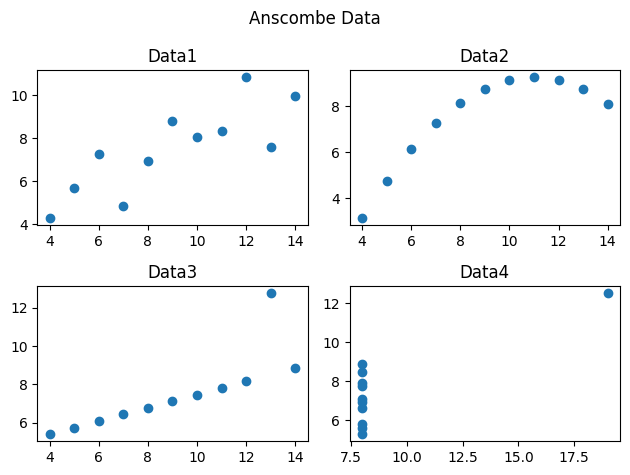

In [39]:
fig = plt.figure() #흰색 도화지

ax1 = fig.add_subplot(2,2,1) # 2행 2열의 1번째 자리 할당
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.scatter(data1['x'],data1['y'])
ax2.scatter(data2['x'],data2['y'])
ax3.scatter(data3['x'],data3['y'])
ax4.scatter(data4['x'],data4['y']) # 점 그래프(이변량 그래프, 두개의 연속편수 필요)

ax1.set_title("Data1")
ax2.set_title("Data2")
ax3.set_title("Data3")
ax4.set_title("Data4")

fig.suptitle("Anscombe Data")
fig.tight_layout()

평균, 표준편차, 상관계수가 비슷한 완전 다른 집합을 한번 알아봤다.

이를 통해 수치만을 가지고 데이터를 믿어서는 안된다는 것을 깨달았다.

그림으로 확인하는 것이 제일 좋다!!
